In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
filename = "./data/microsoft_stockData.csv"

In [2]:
data = pd.read_csv(filename)

In [3]:
data.head()

,timestamp,open,high,low,close,volume
0,1/2/2019,99.55,101.75,98.94,101.12,35329345
1,12/31/2018,101.29,102.40,100.44,101.57,33173765
2,12/28/2018,102.09,102.41,99.52,100.39,38169312
3,12/27/2018,99.30,101.19,96.40,101.18,49498509
4,12/26/2018,95.14,100.69,93.96,100.56,51634793


In [4]:
dateheader = 'timestamp'

In [5]:
x = data[dateheader]

In [6]:
date_objects = [datetime.strptime(x, '%m/%d/%Y').date() for x in x]

In [7]:
def subplot_(X,Y,i,j,title,xlabel,ylabel,label,ax_arr,color='b'):
    ax_arr[i,j].plot(X, Y, color, label = label)
# ax_arr[0,i]jplot([0, 1], [0, 1],'r--')
    ax_arr[i,j].set_title(title,fontsize=20)
    ax_arr[i,j].set_ylabel(ylabel,fontsize=20)
    ax_arr[i,j].set_xlabel(xlabel,fontsize=15)
    ax_arr[i,j].legend(loc = 'best', prop={'size': 16})
#     return ax_arr

In [8]:
list(set(data.columns).difference(set(dateheader)))

['volume', 'open', 'high', 'timestamp', 'low', 'close']

In [9]:
headings = []
for i in data.columns:
    if i != dateheader:
        headings.append(i)
    

In [10]:
data.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

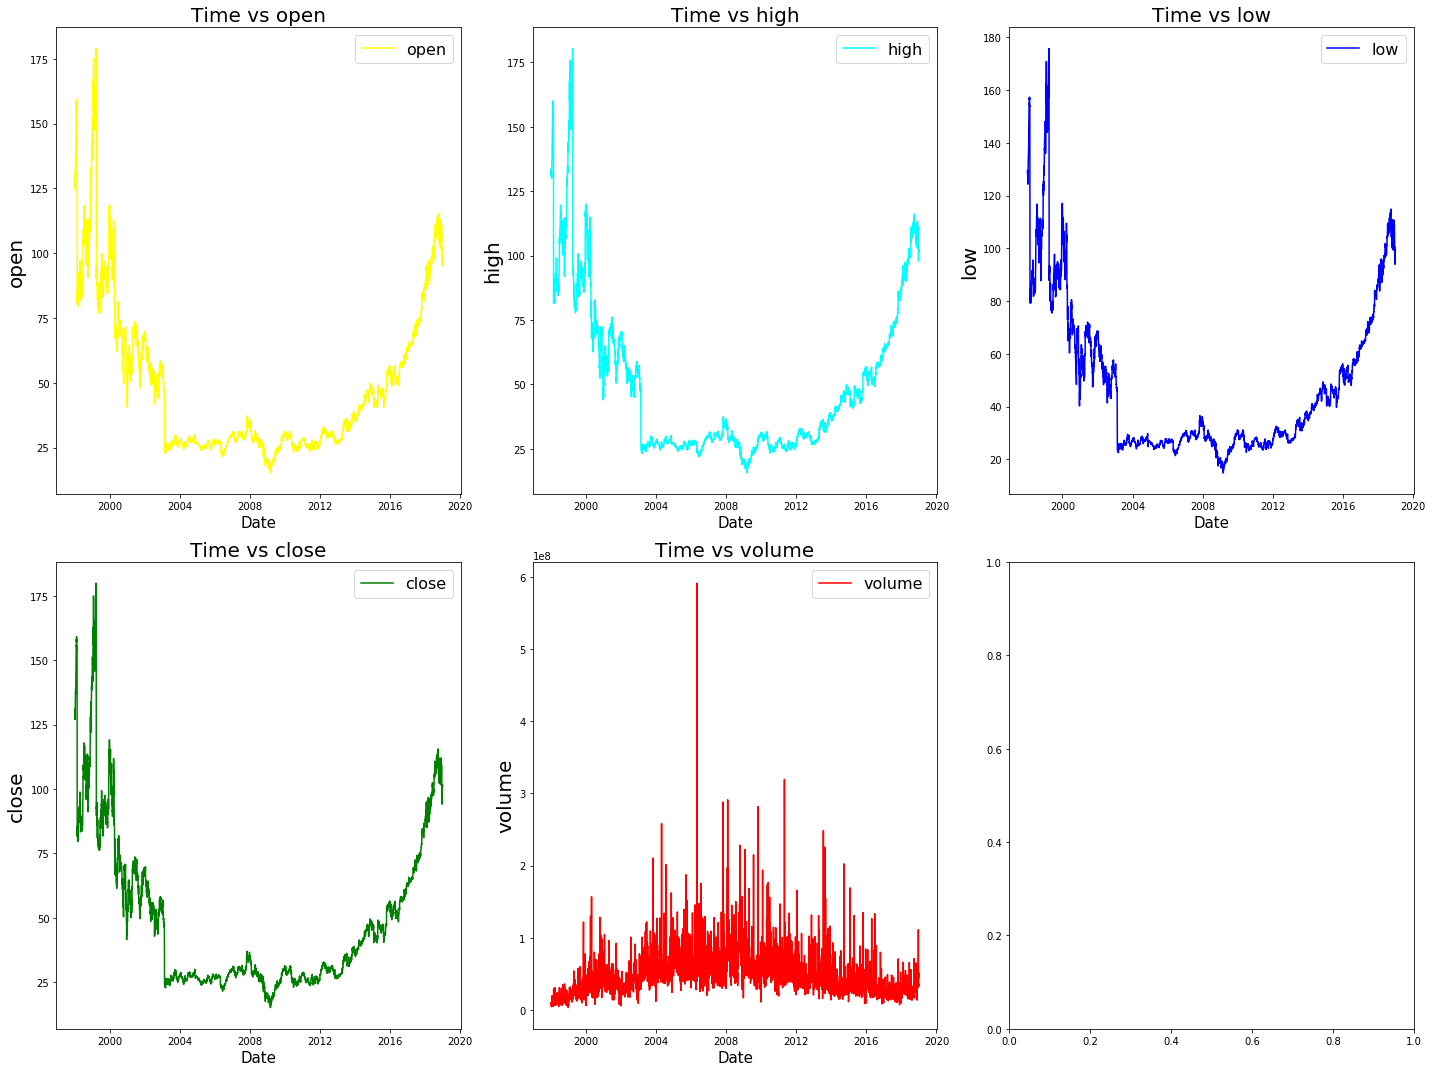

In [11]:
# headings = ['Close', 'Adj Close', 'High', 'Volume', 'Low', 'Open']
index = 0
colors = ['yellow','cyan','blue','green','red','brown']
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))
for row in range(0,2):
    for col in range(0,3):
        subplot_(X=date_objects,Y=data[headings[index]],i=row,j=col,title="Time vs " +headings[index],
                 xlabel="Date",ylabel=headings[index],label=headings[index],ax_arr=ax_arr,color=colors[index])
        index+=1
        if(index >= len(headings)):
            break
    if(index >= len(headings)):
        break
plt.subplots_adjust(wspace=0.2)
plt.tight_layout()

In [12]:
from pandas.plotting import lag_plot,autocorrelation_plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
data_2 = pd.read_csv(filename,header=0,index_col=0)

In [13]:
# lag_plot(data_2)

In [14]:
# autocorrelation_plot(data_2)

In [15]:
# data_2.columns

In [16]:
from statsmodels.tsa.stattools import kpss

for i in headings:
        print("Testing for the feature : "+str(i))
        X = data_2[i]
        test = kpss(X)
        output = pd.Series(test[0:3], index=['Test Statistic','p-value','Number of Lags Used'])
        for key,value in test[3].items():
            output['critical value (%s)'%key] = value
        print (output)

Testing for the feature : open
Test Statistic            3.52312
p-value                   0.01000
Number of Lags Used      33.00000
critical value (10%)      0.34700
critical value (5%)       0.46300
critical value (2.5%)     0.57400
critical value (1%)       0.73900
dtype: float64
Testing for the feature : high
Test Statistic            3.553926
p-value                   0.010000
Number of Lags Used      33.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64
Testing for the feature : low
Test Statistic            3.498591
p-value                   0.010000
Number of Lags Used      33.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64
Testing for the feature : close
Test Statistic            3.524548
p-value                   0.010000
Number of Lags Used      33.00000

In [17]:
new_data  = data
for i in headings:
        new_data[i] = np.log(new_data[i])
        new_data[i] = (new_data[i]  - new_data[i] .shift(1) ).fillna(new_data[i].mode()[0])

for i in headings:
        print("Testing for the feature : "+str(i))
        X = new_data[i]
        test = kpss(X)
        output = pd.Series(test[0:3], index=['Test Statistic','p-value','Number of Lags Used'])
        for key,value in test[3].items():
            output['critical value (%s)'%key] = value
        print (output)

Testing for the feature : open
Test Statistic            0.115503
p-value                   0.100000
Number of Lags Used      33.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64
Testing for the feature : high
Test Statistic            0.113955
p-value                   0.100000
Number of Lags Used      33.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64
Testing for the feature : low
Test Statistic            0.11375
p-value                   0.10000
Number of Lags Used      33.00000
critical value (10%)      0.34700
critical value (5%)       0.46300
critical value (2.5%)     0.57400
critical value (1%)       0.73900
dtype: float64
Testing for the feature : close
Test Statistic            0.115187
p-value                   0.100000
Number of Lags Used      33.00000

In [18]:
from statsmodels.tsa.arima_model import ARMA

def arma_model_fit(X):
    model = ARMA(X,order =(7,1))
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    forecast = model_fit.forecast(steps=7)[0]
    for i in range(len(forecast)):
        print('Day %d: %f' % ((i+1), forecast[i]))    
    
for i in headings:
        print("Model fit and forecast : "+str(i))
#         model_fit = 
        arma_model_fit(data_2[i])
        print ("Predictability of %s values for next 7 days : " % str(i))
#         forecast(model_fit)

Model fit and forecast : open
                              ARMA Model Results                              
Dep. Variable:                   open   No. Observations:                 5284
Model:                     ARMA(7, 1)   Log Likelihood              -11324.126
Method:                       css-mle   S.D. of innovations              2.062
Date:                Tue, 29 Oct 2019   AIC                          22668.252
Time:                        23:19:21   BIC                          22733.976
Sample:                             0   HQIC                         22691.223
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.8159     16.599      3.724      0.000      29.282      94.350
ar.L1.open     1.5238      0.050     30.291      0.000       1.425       1.622
ar.L2.open    -0.5130 

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 5284
Model:                     ARMA(7, 1)   Log Likelihood              -11227.605
Method:                       css-mle   S.D. of innovations              2.025
Date:                Tue, 29 Oct 2019   AIC                          22475.209
Time:                        23:20:11   BIC                          22540.934
Sample:                             0   HQIC                         22498.180
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          62.4088     17.035      3.664      0.000      29.021      95.796
ar.L1.close     0.2877      0.257      1.118      0.263      -0.216       0.792
ar.L2.close     0.6752      0.254      2.658    

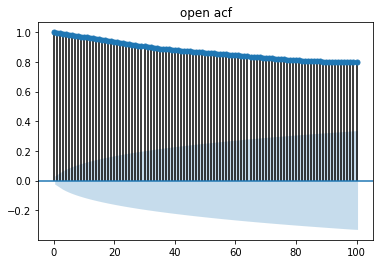

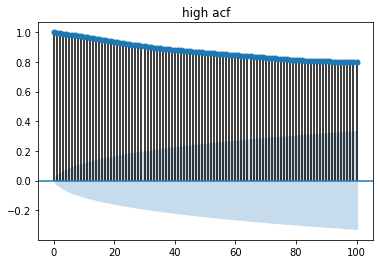

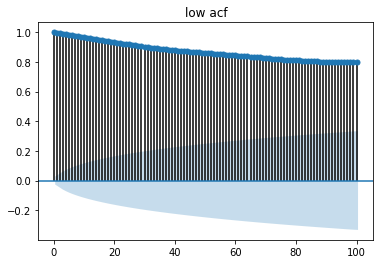

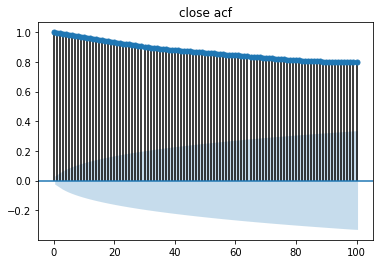

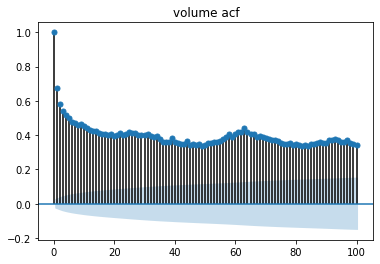

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
lags = 100
for i in headings:
    plot_acf(data_2[i],title=i+ " acf",lags=lags)

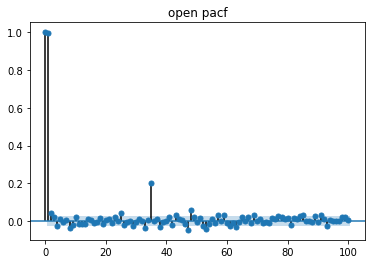

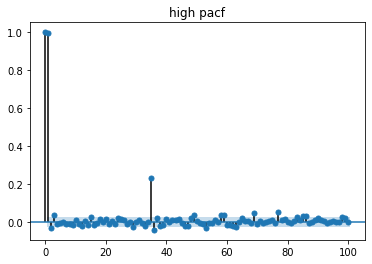

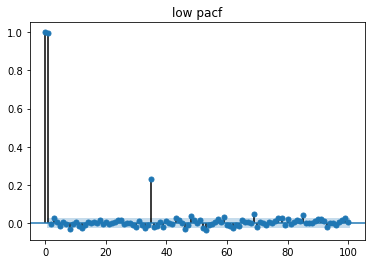

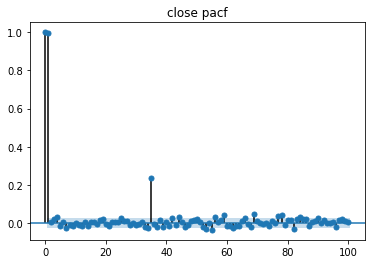

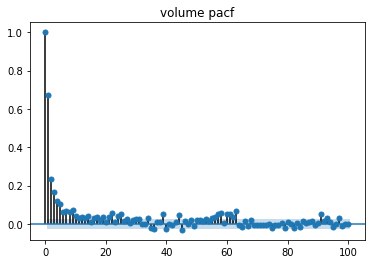

In [20]:
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
for i in headings:
    plot_pacf(data_2[i],title=i + " pacf",lags=lags)